In [40]:
# import libraries

import numpy as np
import sklearn
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn import set_config
import pandas as pd
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import copy
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
warnings.filterwarnings('ignore')
set_config("diagram")
plt.style.use("ggplot")

data = "../data/bank-full.csv"
df = pd.read_csv(data, delimiter=";")

In [2]:
# parameters
scale = True


In [3]:
# random clf
def get_bin(y):
    if y == "no":
        return 0
    if y == "yes":
        return 1

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df["y"] = df["y"].apply(get_bin)
df["default"] = df["default"].apply(get_bin)
df["housing"] = df["housing"].apply(get_bin)
df["loan"] = df["loan"].apply(get_bin)

In [6]:
# change data type tp cat
df.job = pd.Categorical(df.job)
df.marital = pd.Categorical(df.marital)
df.education = pd.Categorical(df.education)
df.contact = pd.Categorical(df.contact)
df.poutcome = pd.Categorical(df.poutcome)

In [7]:
df["job"] = (df.job.cat.codes)+1
df["marital"] = (df.marital.cat.codes)+1
df["education"] = (df.education.cat.codes)+1
df["contact"] = (df.contact.cat.codes)+1
df["poutcome"] = (df.poutcome.cat.codes)+1

In [8]:
df.job = pd.Categorical(df.job)
df.marital = pd.Categorical(df.marital)
df.education = pd.Categorical(df.education)
df.contact = pd.Categorical(df.contact)
df.poutcome = pd.Categorical(df.poutcome)

In [9]:
df = df.drop(["day", "month" ], axis = 1)

In [10]:
y = df["y"]

In [11]:
df = df.drop(["y"], axis=1)
x = df

## Make classifers

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.3)

In [14]:
if scale == True: 
    scale = MinMaxScaler(feature_range=(-1,1))
    scale.fit(X_train)
    X_train = scale.transform(X_train)
    X_test = scale.transform(X_test)

## PCA

In [15]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

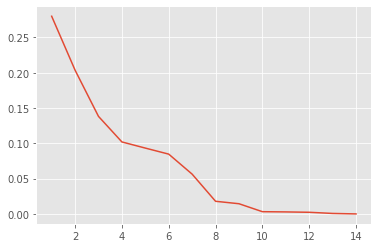

In [16]:
pca = PCA()
pca.fit(np.array(X_train))

plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.show()

In [17]:
pca.explained_variance_ratio_

array([2.80016521e-01, 2.03630328e-01, 1.38189731e-01, 1.01994914e-01,
       9.32965495e-02, 8.47298081e-02, 5.63820565e-02, 1.79570173e-02,
       1.44866291e-02, 3.23227913e-03, 2.89883764e-03, 2.37623806e-03,
       7.44527324e-04, 6.45638862e-05])

In [18]:
num_components = 0
variance_sum = 0
for i in pca.explained_variance_ratio_:
    variance_sum += i
    num_components += 1
    if variance_sum >.95:
        break
print(num_components)
print(variance_sum)

7
0.9582399074832874


In [19]:
pca = PCA(n_components = num_components)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## CLF

In [59]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_pred = dummy_clf.fit(X_train, Y_train).predict(X_test)
dummy_poba = dummy_clf.predict_proba(X_test)
roc_dummy = roc_auc_score(np.array(Y_test).reshape(-1, 1), dummy_poba[:,1])
print(f"ACC = {dummy_clf.score(X_test, Y_test)}, ROC_AUC = {roc_dummy}")

ACC = 0.8838838100855205, ROC_AUC = 0.5


In [64]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_pred = dummy_clf.fit(X_train, Y_train).predict(X_test)
dummy_clf.score(X_test, Y_test)

dummy_poba = dummy_clf.predict_proba(X_test)
roc_dummy = roc_auc_score(np.array(Y_test).reshape(-1, 1), dummy_poba[:,1])
print(f"ACC = {dummy_clf.score(X_test, Y_test)}, ROC_AUC = {roc_dummy}")

ACC = 0.49859923326452377, ROC_AUC = 0.5


In [67]:
knn_clf = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn_clf.predict(X_test)
print(classification_report(knn_pred, Y_test))

knn_poba = knn_clf.predict_proba(X_test)
roc_knn = roc_auc_score(np.array(Y_test).reshape(-1, 1), knn_poba[:,1])
print(f"ROC_AUC = {roc_knn}")

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     13038
           1       0.20      0.60      0.30       526

    accuracy                           0.89     13564
   macro avg       0.59      0.75      0.62     13564
weighted avg       0.95      0.89      0.92     13564

ROC_AUC = 0.8020009347192598


In [68]:
nb_clf = GaussianNB().fit(X_train, Y_train)
nb_pred = nb_clf.predict(X_test)
print(classification_report(nb_pred, Y_test) )

nb_poba = nb_clf.predict_proba(X_test)
roc_nb= roc_auc_score(np.array(Y_test).reshape(-1, 1), nb_poba[:,1])
print(f"ROC_AUC = {roc_nb}")

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11491
           1       0.44      0.34      0.38      2073

    accuracy                           0.83     13564
   macro avg       0.66      0.63      0.64     13564
weighted avg       0.82      0.83      0.82     13564

ROC_AUC = 0.8099055086209979


In [25]:
#svc_clf = SVC(kernel="linear", C = 25, verbose= 2).fit(X_train, Y_train)
#svc_pred = svc_clf.predict(X_test)
#print(classification_report(svc_pred, Y_test))

In [69]:
rf_clf = RandomForestClassifier().fit(X_train, Y_train)
rf_pred = rf_clf.predict(X_test)
print(classification_report(rf_pred, Y_test))

rf_poba = rf_clf.predict_proba(X_test)
roc_rf= roc_auc_score(np.array(Y_test).reshape(-1, 1), rf_poba[:,1])
print(f"ROC_AUC = {roc_rf}")

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12693
           1       0.33      0.59      0.42       871

    accuracy                           0.90     13564
   macro avg       0.65      0.75      0.68     13564
weighted avg       0.93      0.90      0.91     13564

ROC_AUC = 0.8548866355005316


## NN 

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

import tensorflow as tf
from tensorflow.keras.layers import Attention

Using TensorFlow backend.


In [28]:
np.unique(Y_train, return_counts= True)

(array([0, 1]), array([27933,  3714]))

In [29]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

y = ohe.fit_transform(np.array(Y_train).reshape(-1, 1)).toarray()

In [32]:
np.unique(y, return_counts= True)

(array([0., 1.]), array([31647, 31647]))

In [33]:
model = Sequential()
model.add(Dense(16, input_dim = X_train.shape[1], activation = "elu"))
model.add(BatchNormalization())
model.add(Dense(16, activation = "elu"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "elu"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "elu"))
model.add(BatchNormalization())
model.add(Dense(2, activation= "sigmoid"))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                240       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
batch_normalization_3 (Batch (None, 16)                64        
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

In [35]:
model.compile(optimizer = "Adam", loss= "categorical_crossentropy")

In [36]:
hist = model.fit(X_train, y, batch_size= 128, epochs= 10, verbose= 1, validation_split= 0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 28482 samples, validate on 3165 samples
Epoch 1/10
28482/28482 [==============================] - 1s 25us/step - loss: 0.4246 - val_loss: 0.3749
Epoch 2/10
28482/28482 [==============================] - 0s 7us/step - loss: 0.3533 - val_loss: 0.3309
Epoch 3/10
28482/28482 [==============================] - 0s 6us/step - loss: 0.2905 - val_loss: 0.3004
Epoch 4/10
28482/28482 [==============================] - 0s 7us/step - loss: 0.2566 - val_loss: 0.2548
Epoch 5/10
28482/28482 [==============================] - 0s 7us/step - loss: 0.2497 - val_loss: 0.2498
Epoch 6/10
28482/28482 [==============================] - 0s 7us/step - loss: 0.2468 - val_loss: 0.2639
Epoch 7/10
28482/28482 [==============================] - 0s 7us/step - loss: 0.2447 - val_loss: 0.2440
Epoch 8/10
28482/28482 [==============================] - 0s 7us/step - loss: 0.2428 - val_loss: 0.2432
Epoch 9/10
28482/28482 

In [37]:
nn_pred = model.predict(X_test)

In [38]:
nn_preds = np.argmax(nn_pred, axis = 1)

In [70]:
print(classification_report(nn_preds, Y_test))
roc_nn= roc_auc_score(np.array(Y_test).reshape(-1, 1), nn_pred[:,1])
print(f"ROC_AUC = {roc_nn}")

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12721
           1       0.31      0.59      0.41       843

    accuracy                           0.89     13564
   macro avg       0.64      0.75      0.68     13564
weighted avg       0.93      0.89      0.91     13564

ROC_AUC = 0.883705751436171
